# Methods Used:
# 1. Moving Average(Mean)
# 2. ARIMA

# 
# 






# 1) Predicting Prices Using the Moving Average (MA) method

### LOADING DATA of TATAMOTORS daily Stock market prices from 1996 to 2009 and normalizing it

In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_excel('ETHUSD=X.xlsx')

#print the head


C:\Users\1864012\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


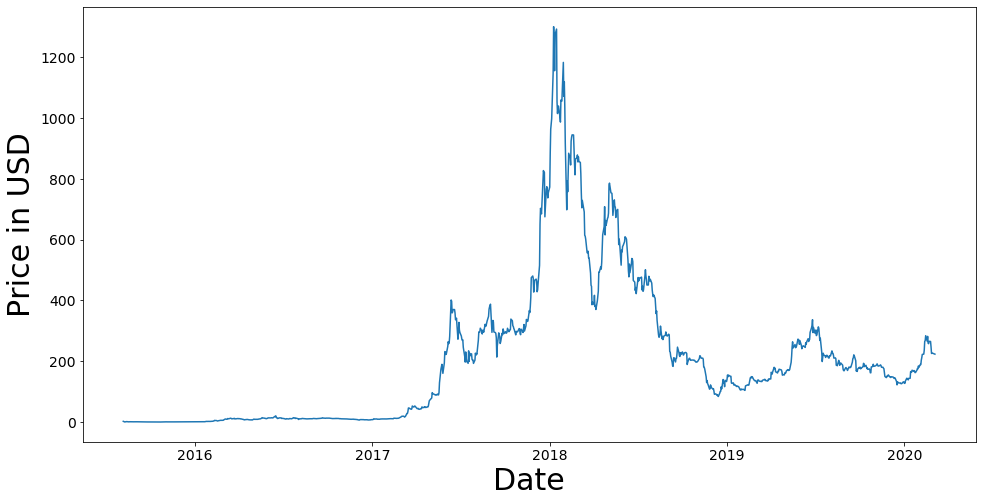

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%d-%m-%y')
df.index = df['Date']
df.fillna(method='ffill', inplace=True)
#plot the data (close price)
plt.figure(figsize=(16,8))
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price in USD', fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(df['Close'], label='Close Price history')

In [3]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-08-07,2015-08-07,2.831620,2.521120,3.536610,2.772120,2.772120,16432900
2015-08-10,2015-08-10,0.713989,0.636546,0.729854,0.708448,0.708448,40528300
2015-08-11,2015-08-11,0.708087,0.663235,1.131410,1.067860,1.067860,146310000
2015-08-12,2015-08-12,1.058750,0.883608,1.289940,1.217440,1.217440,215062000
2015-08-13,2015-08-13,1.222240,1.171990,1.965070,1.827670,1.827670,406868000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-02-25,2020-02-25,265.283386,246.858994,265.431458,247.817596,247.817596,0
2020-02-26,2020-02-26,247.740204,221.266571,249.649689,225.680267,225.680267,0
2020-02-27,2020-02-27,225.687057,212.664536,237.228912,226.753387,226.753387,0
2020-02-28,2020-02-28,226.987610,216.346207,234.208954,226.760498,226.760498,0
2020-03-04,2020-03-04,224.479630,223.514908,223.514908,223.514908,223.514908,0


In [5]:
df.size

8344

In [6]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


### Predicting the close price of the day depending on the prices of the 10 previous days
### 40 days

In [7]:
df['10_days_MA'] = np.NaN
def make_window(window_size, start_point):
    return [start_point+x for x in range(window_size)]
window_size = 10
forward_days = 10 # > 1, ou seja, 2,3,4,5,...
for index in range(window_size, len(df), forward_days): #Range(Start, Stop, Step)
    for i in range(0,forward_days):#Range(Start, Stop)
        if index+i >= len(df):
            break
        window_close = make_window(window_size-i, index+i-window_size)
        #print(window_close)
        window_MA = make_window(i, index)
        #print(window_MA)
        mean = pd.concat([ df['Close'].iloc[window_close], df['10_days_MA'].iloc[window_MA] ]).mean(axis=0)
        df.iat[index+i, df.columns.get_loc('10_days_MA')] = mean


In [8]:
print("MSE for MA")
print((np.mean((df['Close']-df['10_days_MA'])**2)))

MSE for MA
4438.074565039582


### Draw Pridected prices in red and the real prices in blue

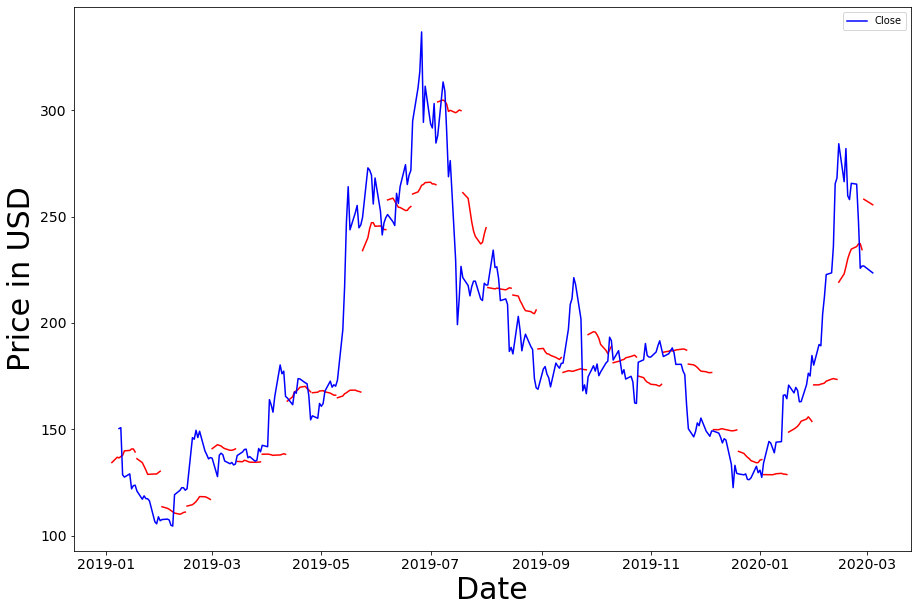

In [9]:
limit=300
plt.figure(figsize = (15,10))

size = len(df)-limit - (len(df)-limit)%forward_days

for index in range(size, len(df), forward_days):
    plt.plot(df['10_days_MA'][index:index+forward_days], color='r')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Price in USD', fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(df['Close'][-limit:], color='b', label='Close')
plt.legend(loc='best')
plt.show()

### MSE for MA is 137.59

# 
# 
# 
# 
# 
# 


# 2) Predicting using ARIMA

### ARIMA is an acronym that stands for 'Auto Regressive Integrated Moving Average'. It is a class of model that captures a suite of different standard temporal structures in time series data.


In [3]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams


## Load Data

In [4]:
df = pd.read_excel('ETHUSD=X.xlsx')

#set date as index
df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)
#keep only the 'Close' column
df.fillna(method='ffill', inplace=True)
#df = df['Close']
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,2.521120,3.536610,2.772120,2.772120,16432900
1,2015-08-10,0.713989,0.636546,0.729854,0.708448,0.708448,40528300
2,2015-08-11,0.708087,0.663235,1.131410,1.067860,1.067860,146310000
3,2015-08-12,1.058750,0.883608,1.289940,1.217440,1.217440,215062000
4,2015-08-13,1.222240,1.171990,1.965070,1.827670,1.827670,406868000


### Predict

In [5]:
"""
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
            yhat += coef[i-1] * history[-i]
    return yhat

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))


train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    modelarima = ARIMA(history, order=(1,0,0))
    modelarima_fit = modelarima.fit(trend='nc', disp=False)
    ar_coef = modelarima_fit.arparams
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('MSE Mean Squared Error for ARIMA: %.3f' % error)
#error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error)

dff=test_ar-predictions
dff.max()
"""

<class 'list'>
MSE Mean Squared Error for ARIMA: 106.493
Symmetric mean absolute percentage error: 106.493


30.724123032601142

In [6]:

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = df['Close']
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
        model = ARIMA(history, order=(7,1,1))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
predictions = [x + 5 for x in predictions] 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 148.416


In [10]:
type(predictions)
predictions = [x + 5 for x in predictions] 
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 357.843


In [3]:
import pandas
datedate = pandas.read_excel('ETHUSD=X.xlsx', usecols=[0], skipfooter=3)

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.grid()
plt.plot(predictions, label=' predicted', color='red')
plt.plot(test, label=' actual value', color='blue')
#plt.plot(test_ar-predictions, label='difference', color='green')
datee=df["Date"]
size = int(len(datee) * 0.34)
datee=datee[size:len(datee)]
print(datee)
plt.xlabel('Date', fontsize=25)
plt.ylabel('Price in USD', fontsize=25)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.legend()

plt.show()

NameError: name 'plt' is not defined

## 

In [ ]:
df['Close'].max()


### MSE for ARIMA is 79.342
### ARIMA has no previous days